In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = './processed_data/' 

In [35]:
def plot_heatmap(data, title, figsize=(20, 40), range=None, start=0):
    if range is None:
        range = data.shape[0]  
    plt.figure(figsize=figsize)
    data = data.iloc[start:start+range]
    plt.imshow(data, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.xticks(ticks=np.arange(data.shape[1]), labels=data.columns, rotation=90)
    plt.yticks(ticks=np.arange(data.shape[0]), labels=data.index)
    plt.title(title)
    plt.show()

def load_data(filename):
    data = pd.read_csv(os.path.join(input_dir, filename))
    return data

def sort(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    data['mean'] = data[numeric_columns].mean(axis=1)  
    data = data.sort_values(by='mean', ascending=False)
    data.drop(columns=['mean'], inplace=True)
    return data

def plot_row_trend(data, row_index, title, figsize=(10, 6)):
    row_data = data.iloc[row_index]
    
    years = row_data.index.str.extract(r'(\d+)', expand=False).dropna().astype(int)
    valid_indices = row_data.notna()
    valid_years = years[valid_indices[1:]].astype(int)
    values = row_data[valid_indices].values[1:] 
    
    plt.figure(figsize=figsize)
    plt.plot(valid_years, values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Electricity Demand (TWh)')
    plt.title(f'{title} - Entity: {data.iloc[row_index]["Entity"]}')
    plt.grid(True)
    plt.show()


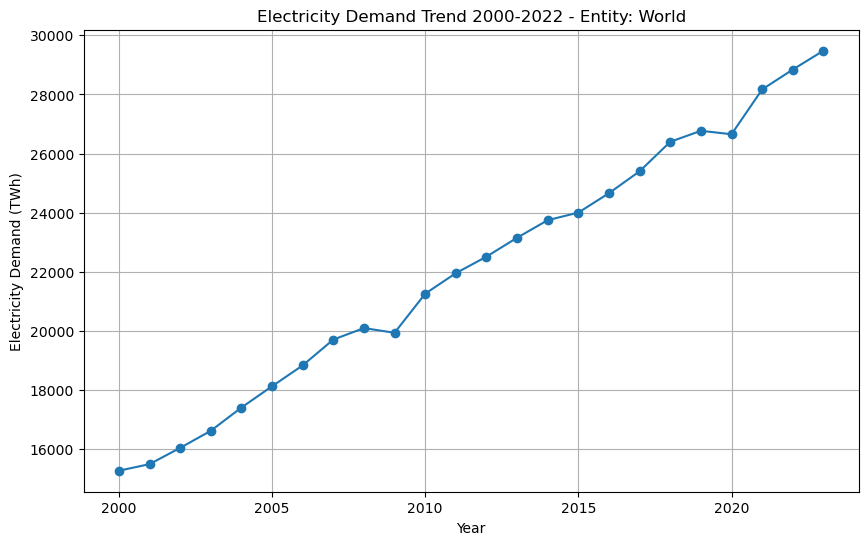

In [39]:
trend_data = load_data('electricity-demand_processed.csv')
trend_data = sort(trend_data)
plot_row_trend(trend_data, row_index=0, title='Electricity Demand Trend 2000-2022')

(238, 24)


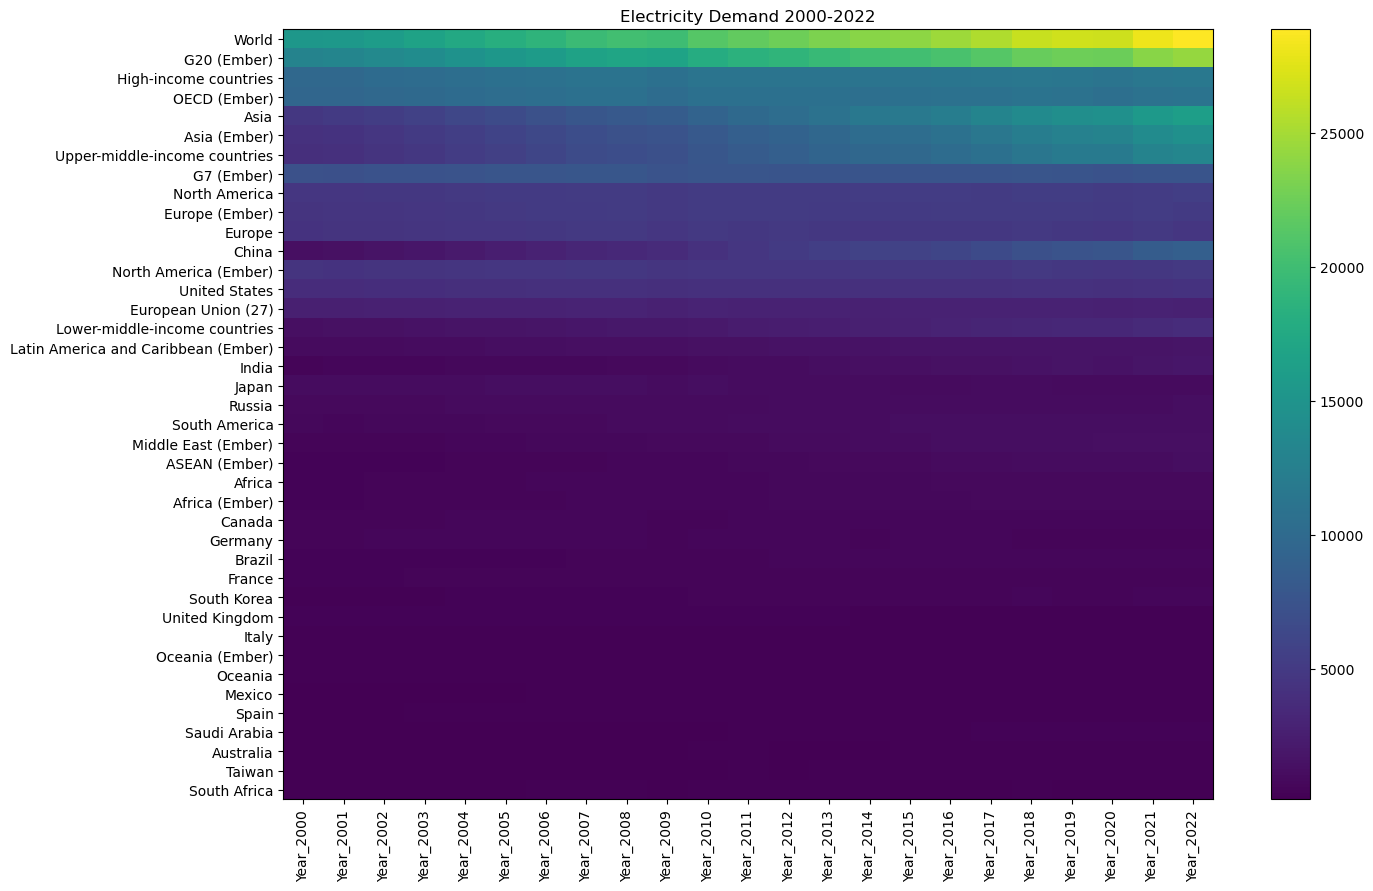

In [37]:
pivot_data = load_data('electricity-demand_processed.csv')
years_to_keep = [f'Year_{year}' for year in range(2000, 2023)]
pivot_data = pivot_data[['Entity'] + years_to_keep]
print(pivot_data.shape)
pivot_data = sort(pivot_data)
pivot_data.set_index('Entity', inplace=True)

plot_heatmap(pivot_data, 'Electricity Demand 2000-2022', figsize=(15, 10), range=40, start=0)